# CNN

In this assignment, we'll have two experiments:
- Image classification: Diagnose COVID-19 by CT images
- Text classification: Classify worry level using word vectors and CNN 

## Task 1: Diagnose COVID-19 by CT images

Please first download the CT images
- `COVID-19 CT scans`: https://github.com/UCSD-AI4H/COVID-CT/blob/master/Images-processed/CT_COVID.zip. In total, there are 349 images.
- `Non-COVID-19 Scans`: https://github.com/UCSD-AI4H/COVID-CT/blob/master/Images-processed/CT_NonCOVID.zip. There are 397 images in total.

This dataset may be a little small for CNN models. 

### Task 1.1. Data Preprocessing

- Read the image files and put them into separate folders for `training`, `evaluation`, and `testing` 
- For each class, use 60% images for training, 20% for validation, and 20% for testing
- Create data generator for training, validation, and test datasets. Since the CT scans are grayscale (only 1 channel), we set `color_mode = 'grayscale'` in the generator. 

In [1]:
# Add your code here
import os, shutil

In [2]:
path_name='C:/BIA667/origional/CT_COVID'

i=1
for item in os.listdir(path_name):
    os.rename(os.path.join(path_name,item),os.path.join(path_name,(str(i)+'.jpg')))#os.path.join(path_name,item)
    i+=1

In [3]:
path_name_1='C:/BIA667/origional/CT_NonCOVID'
i=1
for item in os.listdir(path_name_1):
    os.rename(os.path.join(path_name_1,item),os.path.join(path_name_1,('Non_C'+str(i)+'.jpg')))
    i+=1

In [10]:
# The path to the directory where the original

original_dataset_dir_C = 'C:/BIA667/origional/CT_COVID'
original_dataset_dir_NonC = 'C:/BIA667/origional/CT_NonCOVID' 

# The directory where we will
# store our smaller dataset
base_dir = 'C:/BIA667/base'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
    
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)
    
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)

# Directory with our training COVID-19 pictures
train_COVID_19_dir = os.path.join(train_dir, 'COVID-19')
if not os.path.exists(train_COVID_19_dir):
    os.mkdir(train_COVID_19_dir)

# Directory with our training Non-COVID-19 pictures
train_Non_COVID_19_dir = os.path.join(train_dir, 'Non-COVID-19')
if not os.path.exists(train_Non_COVID_19_dir):
    os.mkdir(train_Non_COVID_19_dir)

# Directory with our validation COVID-19 pictures
validation_COVID_19_dir = os.path.join(validation_dir, 'COVID-19')
if not os.path.exists(validation_COVID_19_dir):
    os.mkdir(validation_COVID_19_dir)

# Directory with our validation Non-COVID-19 pictures
validation_Non_COVID_19_dir = os.path.join(validation_dir, 'Non-COVID-19')
if not os.path.exists(validation_Non_COVID_19_dir):
    os.mkdir(validation_Non_COVID_19_dir)

# Directory with our validation COVID-19 pictures
test_COVID_19_dir = os.path.join(test_dir, 'COVID-19')
if not os.path.exists(test_COVID_19_dir):
    os.mkdir(test_COVID_19_dir)

# Directory with our validation Non-COVID-19 pictures
test_Non_COVID_19_dir = os.path.join(test_dir, 'Non-COVID-19')
if not os.path.exists(test_Non_COVID_19_dir):
    os.mkdir(test_Non_COVID_19_dir)

# Copy first 209 COVID-19 images to train_COVID-19_dir
fnames = ['{}.jpg'.format(i) for i in range(1,210)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_C, fname)
    dst = os.path.join(train_COVID_19_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 70 COVID-19 images to validation_COVID-19_dir
fnames = ['{}.jpg'.format(i) for i in range(210, 280)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_C, fname)
    dst = os.path.join(validation_COVID_19_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 70 COVID-19 images to test_COVID-19_dir
fnames = ['{}.jpg'.format(i) for i in range(280, 350)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_C, fname)
    dst = os.path.join(test_COVID_19_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 237 Non-COVID-19 images to train_Non-COVID-19_dir
fnames = ['Non_C{}.jpg'.format(i) for i in range(1,238)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_NonC, fname)
    dst = os.path.join(train_Non_COVID_19_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 80 Non-COVID-19 images to validation_Non-COVID-19_dir
fnames = ['Non_C{}.jpg'.format(i) for i in range(238, 318)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_NonC, fname)
    dst = os.path.join(validation_Non_COVID_19_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 80 Non-COVID-19 images to test_Non-COVID-19_dir
fnames = ['Non_C{}.jpg'.format(i) for i in range(318, 398)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_NonC, fname)
    dst = os.path.join(test_Non_COVID_19_dir, fname)
    shutil.copyfile(src, dst)

### Task 1.2. Build Model

- Create a CNN models with appropriate layers of `Convolution`, `MaxPooling2D`, and `Dense` layers. Use appropriate activation functions for these layers.
- Since this dataset is small, it may be easily get overfitted. Leverage `Dropout` or other regularization techniques to fight overfitting
- Compile model with appropriate optimizer and loss function.
- Plot the model structure

In [5]:
# Add your code here
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

C:\Users\Jiang\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.






Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 64)        36928     
__________

In [7]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        color_mode = 'grayscale',
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        color_mode = 'grayscale',
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=150,
        color_mode = 'grayscale',
        class_mode='binary')

Found 446 images belonging to 2 classes.
Found 150 images belonging to 2 classes.
Found 150 images belonging to 2 classes.


In [12]:
for data_batch, labels_batch in test_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break
    

data batch shape: (150, 150, 150, 1)
labels batch shape: (150,)


In [13]:
print(labels_batch)


[0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0.
 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1.
 0. 1. 1. 0. 0. 0.]


### Task 1.3. Fit your model

- Train the model until it converges. 
- Plot the loss and accuracy of the model over the training and validation data during training
- Test the model using test dataset. We samples a few batches from the test generator. For example, if each batch returns 20 images, with 8 batches, we can approximately get all images from the test subset. 
- Print out the precision, recall, and F-1 score of each class

In [14]:
# Add your code here

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor



Epoch 1/20





100/100 [==============================] - 39s 386ms/step - loss: 0.6712 - acc: 0.5937 - val_loss: 0.6988 - val_acc: 0.4957
Epoch 2/20
100/100 [==============================] - 41s 413ms/step - loss: 0.6077 - acc: 0.6727 - val_loss: 0.7202 - val_acc: 0.4755
Epoch 3/20
100/100 [==============================] - 43s 435ms/step - loss: 0.5415 - acc: 0.7518 - val_loss: 0.7591 - val_acc: 0.5277
Epoch 4/20
100/100 [==============================] - 43s 428ms/step - loss: 0.4816 - acc: 0.7929 - val_loss: 0.8194 - val_acc: 0.5298
Epoch 5/20
100/100 [==============================] - 51s 513ms/step - loss: 0.4308 - acc: 0.8149 - val_loss: 0.9043 - val_acc: 0.5021
Epoch 6/20
100/100 [==============================] - 51s 506ms/step - loss: 0.3830 - acc: 0.8297 - val_loss: 1.0127 - val_acc: 0.5191
Epoch 7/20
100/100 [==============================] - 46s 465ms/

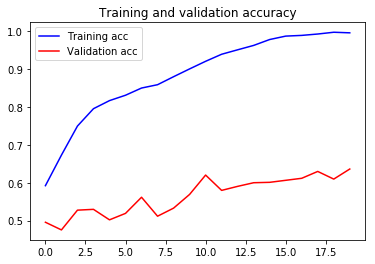

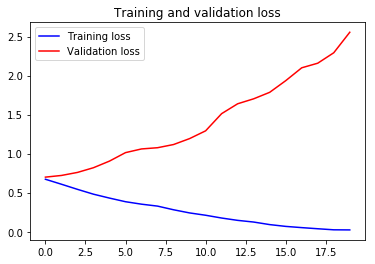

In [15]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b-', label='Training acc')
plt.plot(epochs, val_acc, 'r-', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [16]:
import numpy as np
preds = model.predict_generator(test_generator)
y_pred = np.where(preds>0.5,1,0)

y_true=test_generator.classes
class_labels = list(test_generator.class_indices.keys())

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

          0       0.43      0.47      0.45        70
          1       0.50      0.46      0.48        80

avg / total       0.47      0.47      0.47       150



In [18]:
score = model.evaluate_generator(test_generator)
score
#print('Test score:', score[0])
#print('Test accuracy:', score[1])

[2.106870651245117, 0.6133333444595337]

### Task 1.4. Using data augmentation
- Try a few data augmentation techniques
    - e.g. slight rotation, shift, zoom etc. to see if the model performance can be improved. 
    - Note that CT scans usually are well positions. Just try minor adjustment without unrealistic changes to images.
- Repeat Task 1.3 with the augmented data 


In [19]:

datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


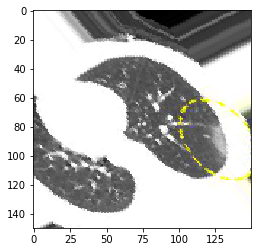

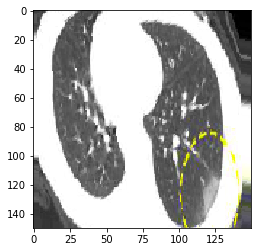

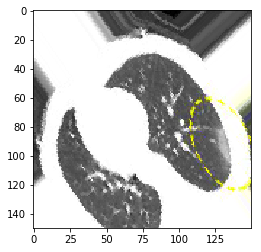

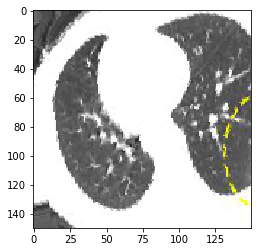

In [20]:
# This is module with image preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_COVID_19_dir, fname) for fname in os.listdir(train_COVID_19_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 1)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 1)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [22]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [23]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        color_mode = 'grayscale',
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        color_mode = 'grayscale',
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=150,
        color_mode = 'grayscale',
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50)

Found 446 images belonging to 2 classes.
Found 150 images belonging to 2 classes.
Found 150 images belonging to 2 classes.
Epoch 1/20
50/50 [==============================] - 34s 677ms/step - loss: 0.6880 - acc: 0.5475 - val_loss: 0.6983 - val_acc: 0.4467
Epoch 2/20
50/50 [==============================] - 39s 785ms/step - loss: 0.6651 - acc: 0.6037 - val_loss: 0.7184 - val_acc: 0.4600
Epoch 3/20
50/50 [==============================] - 45s 910ms/step - loss: 0.6415 - acc: 0.6202 - val_loss: 0.7277 - val_acc: 0.4600
Epoch 4/20
50/50 [==============================] - 52s 1s/step - loss: 0.6364 - acc: 0.6351 - val_loss: 0.7510 - val_acc: 0.4533
Epoch 5/20
50/50 [==============================] - 43s 864ms/step - loss: 0.6222 - acc: 0.6530 - val_loss: 0.7467 - val_acc: 0.4733
Epoch 6/20
50/50 [==============================] - 44s 873ms/step - loss: 0.6097 - acc: 0.6542 - val_loss: 0.8057 - val_acc: 0.4400
Epoch 7/20
50/50 [==============================] - 48s 957ms/step - loss: 0.6065 

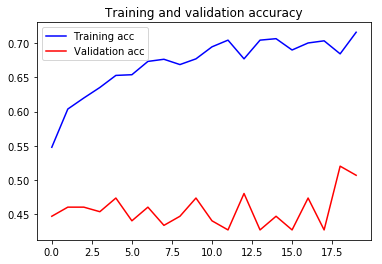

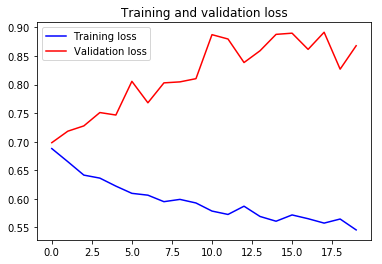

In [24]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b-', label='Training acc')
plt.plot(epochs, val_acc, 'r-', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [25]:
import numpy as np
preds = model.predict_generator(test_generator)
y_pred = np.where(preds>0.5,1,0)

y_true=test_generator.classes
class_labels = list(test_generator.class_indices.keys())

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

          0       0.43      0.76      0.55        70
          1       0.37      0.12      0.19        80

avg / total       0.40      0.42      0.36       150



In [27]:
score = model.evaluate_generator(test_generator)
score
#print('Test score:', score[0])
#print('Test accuracy:', score[1])

[0.8570441603660583, 0.4466666579246521]

## Task 2: Classify Worry Level (low vs. high) by CNN

Let's use `text_long` column this time since CNN model would expect rich text. You can reference `Lab_2_CNN_Text_Classification` for the steps needed in this task.


### Task 2.1 Data Processing
- Before you create the CNN model, do the following preprocessing:
    - Decide the max number of words in the corpus and the max length of documents
    - Tokenize each document and convert each document into a sequence of numbers (hint: you can use `keras.preprocessing.text` and `keras.preprocessing.sequence` to achive this)
    - Make all documents have uniform length by padding short ones with zero and truncating long ones
    - After preprocessing, split the samples into training, validation, and test as you did in HW_2
    - For the label: Let's create a `binary` variable called "worry_level", which is set to 1 (i.e. high) if `worry>5`, otherwise, 0 (i.e. low)

In [28]:
# Load the data and preprocess it
import keras
from keras.layers import Embedding, Dense, Conv1D, MaxPooling1D, Dropout, Activation, Input, Flatten, Concatenate
import pandas as pd
from gensim import corpora
from keras.models import Model

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


data = pd.read_csv("RWWD.csv")
data.head()
    
data["worry_level"] = data.worry.apply(lambda x: 1 if x>5 else 0)
data.head()


,ID,worry,chosen_emotion,anger,disgust,fear,anxiety,sadness,happiness,relaxation,desire,text_long,text_short,worry_level
0,1,3,Sadness,5,5,3,7,7,2,4,5,It is less an much an issue of how it affects ...,It is very easy! Stay inside so you are not sp...,0
1,2,8,Anxiety,6,7,7,8,6,4,3,1,I am concerned that the true impact of the cur...,"Things are difficult now, but we must all pull...",1
2,3,4,Relaxation,1,1,2,2,4,7,7,2,"Personally, I am fairly calm about the corona ...","People should try and remain calm, as panic wi...",0
3,4,6,Relaxation,4,2,3,4,1,6,7,3,In this very moment as I am fortunate to be ab...,Fortunate to feel calm and relaxed but worried...,1
4,5,6,Anxiety,2,2,5,5,5,4,4,4,I am more worried about getting access to my n...,Not being able to cuddle my family sucks!,1


In [29]:
df=data.iloc[:,11]
df.head()

0    It is less an much an issue of how it affects ...
1    I am concerned that the true impact of the cur...
2    Personally, I am fairly calm about the corona ...
3    In this very moment as I am fortunate to be ab...
4    I am more worried about getting access to my n...
Name: text_long, dtype: object

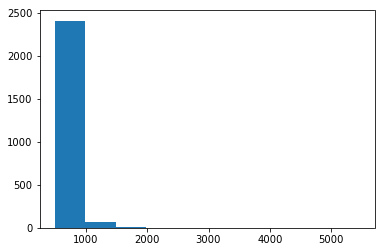

In [3]:
from matplotlib import pyplot as plt
plt.hist([len(text_long) for text_long in df])
plt.show()


In [4]:
DOC_LEN = 1000
MAX_WORDS = 10000

tokenizer = Tokenizer(num_words=MAX_WORDS)
tokenizer.fit_on_texts(df)
sequences = tokenizer.texts_to_sequences(df)
word_index = tokenizer.word_index


In [5]:
df2 = keras.preprocessing.sequence.pad_sequences(
    sequences, maxlen = DOC_LEN, dtype='int32', \
    padding='post', truncating='post', value=0.0)
df2

array([[ 11,   8, 263, ...,   0,   0,   0],
       [  1,  10,  96, ...,   0,   0,   0],
       [386,   1,  10, ...,   0,   0,   0],
       ...,
       [  1,  18, 264, ...,   0,   0,   0],
       [ 11,   8, 137, ...,   0,   0,   0],
       [  1,  18, 687, ...,   0,   0,   0]])

In [6]:
col=data.iloc[:,-1]
label = col.values
label

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(df2, label, test_size=0.2, shuffle=True)
print("x train size: {}, y train size: {}"
      .format(len(x_train), len(y_train)))
print("x test size: {}, y test size: {}"
      .format(len(x_test), len(y_test)))

x train size: 1992, y train size: 1992
x test size: 499, y test size: 499


### Task 2.2.  Create a CNN model 

- Your model should contain the follow layers (Not limited as the following structure plot):
    - Embedding (Note, you are not required to use pretrained word vector in the embedding layer)
    - Convolution
    - MaxPool1D
    - Flatten, Concatenate, Dropout if needed
    - Dense
- Choose appropriate filter size and number of filters for each convolution layer
- Use appropriate activate functions for all layers
- Plot the model structure
- Fit the model with Early Stopping technique. You can reference `Lab1_1_Model_Basics_Image_Classification` for this step.
- Plot the loss and accuracy of the model over the training and validation data during training process
- Test the model using test dataset and show testing accuracy


In [8]:

from keras.layers import Embedding, Dense, Conv1D, MaxPooling1D, \
Dropout, Activation, Input, Flatten, Concatenate
from keras.models import Model

# The dimension for embedding
EMBEDDING_DIM=100

# define input layer, where a sentence represented as
# 1 dimension array with integers
main_input = Input(shape=(DOC_LEN,), dtype='int32', name='main_input')

# define the embedding layer

embed_1 = Embedding(input_dim = MAX_WORDS, \
                    output_dim = EMBEDDING_DIM, \
                    input_length = DOC_LEN,\
                    name='embedding')(main_input)


# define 1D convolution layer
# 64 filters are used
# a filter slides through each word (kernel_size=1)
# input to this layer is the embedding layer
conv1d_1= Conv1D(filters=64, kernel_size=1, \
                 name='conv_unigram',\
                 activation='relu')(embed_1)

# define a 1-dimension MaxPooling 
# to take the output of the previous convolution layer
# the convolution layer produce 

pool_1 = MaxPooling1D(DOC_LEN-1+1, \
                      name='pool_unigram')(conv1d_1)

# The pooling layer creates output 

flat_1 = Flatten(name='flat_unigram')(pool_1)

# following the same logic to define 
# filters for bigram
conv1d_2= Conv1D(filters=64, kernel_size=2, \
                 name='conv_bigram',\
                 activation='relu')(embed_1)
pool_2 = MaxPooling1D(DOC_LEN-2+1, name='pool_bigram')(conv1d_2)
flat_2 = Flatten(name='flat_bigram')(pool_2)

# filters for trigram
conv1d_3= Conv1D(filters=64, kernel_size=3, \
                 name='conv_trigram',activation='relu')(embed_1)
pool_3 = MaxPooling1D(DOC_LEN-3+1, name='pool_trigram')(conv1d_3)
flat_3 = Flatten(name='flat_trigram')(pool_3)

# Concatenate flattened output
z=Concatenate(name='concate')([flat_1, flat_2, flat_3])

# Create a dropout layer
# In each iteration only 50% units are turned on
drop_1=Dropout(rate=0.5, name='dropout')(z)

# Create the output layer
preds = Dense(1, activation='sigmoid', name='output')(drop_1)

# create the model with input layer
# and the output layer
model = Model(inputs=main_input, outputs=preds)

model.summary()




Instructions for updating:
keep_dims is deprecated, use keepdims instead

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         (None, 1000)         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1000, 100)    1000000     main_input[0][0]                 
__________________________________________________________________________________________________
conv_unigram (Conv1D)           (None, 1000, 64)     6464        embedding[0][0]                  
__________________________________________________________________________________________________
conv_bigram (Con

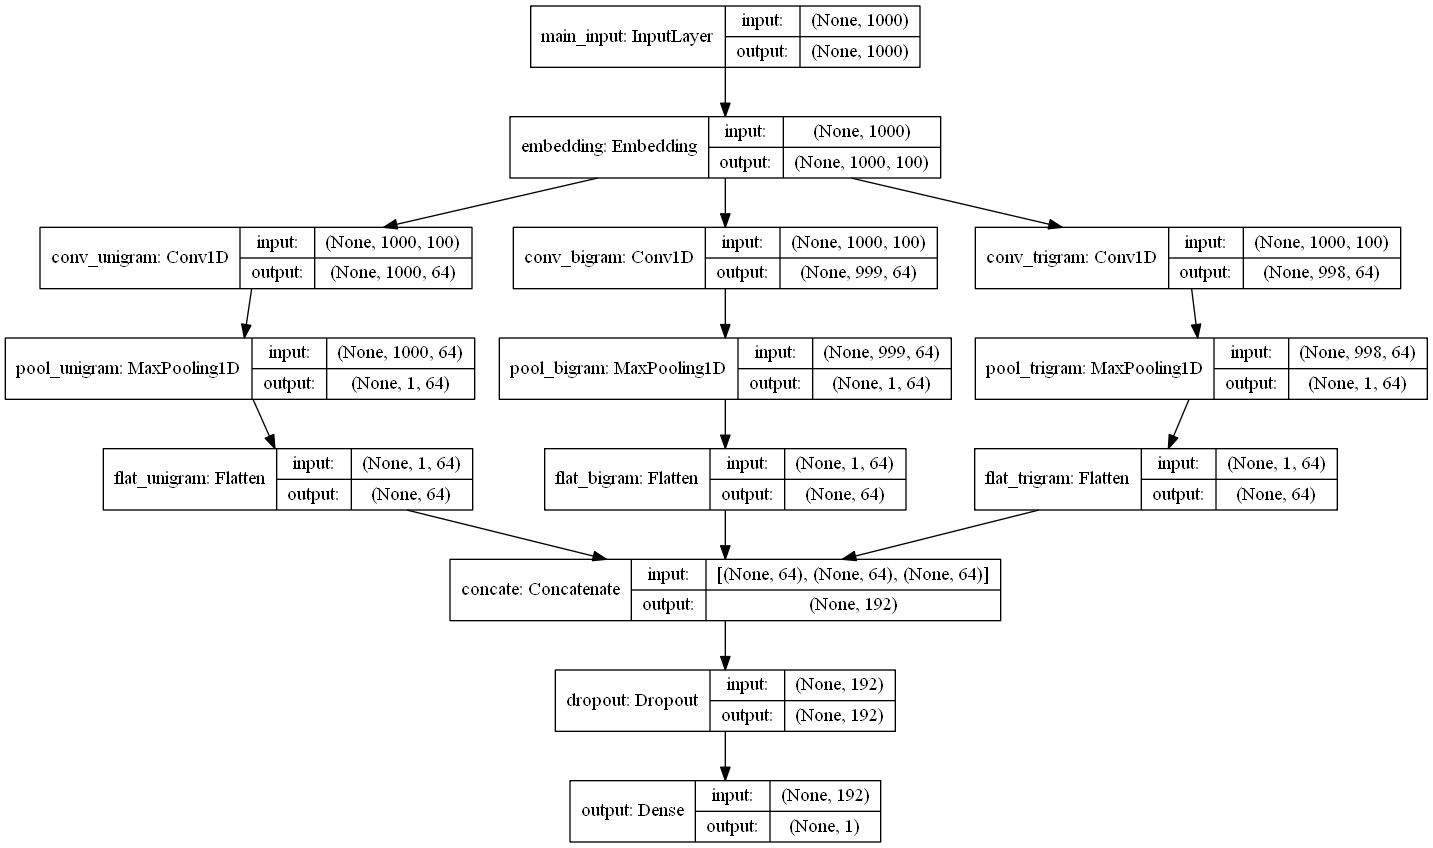

In [9]:
from IPython.display import Image
from keras.utils.vis_utils import model_to_dot
G = model_to_dot (model, show_shapes = True)
Image (G.create (prog = "dot", format = "png"))

In [11]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [20]:
from keras import callbacks 

es = callbacks.EarlyStopping(monitor='val_accuracy', \
                             verbose = 1,
                             patience = 2, \
                             mode='max')

mc = callbacks.ModelCheckpoint('best_model.h5',\
                               save_best_only = True,
                               verbose = 1, \
                               mode = 'max',
                               monitor='val_accuracy')

history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split =0.2,
                    callbacks=[es,mc])

Train on 1593 samples, validate on 399 samples
Epoch 1/20
1593/1593 [==============================] - 5s 3ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 1.2781 - val_acc: 0.7343


C:\Users\Jiang\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\keras\callbacks.py:494: RuntimeWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: val_loss,val_acc,loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
C:\Users\Jiang\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\keras\callbacks.py:403: RuntimeWarning: Can save best model only with val_accuracy available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


Epoch 2/20
1593/1593 [==============================] - 5s 3ms/step - loss: 9.1231e-04 - acc: 1.0000 - val_loss: 1.3723 - val_acc: 0.7343
Epoch 3/20
1593/1593 [==============================] - 5s 3ms/step - loss: 8.4115e-04 - acc: 1.0000 - val_loss: 1.4032 - val_acc: 0.7268
Epoch 4/20
1593/1593 [==============================] - 6s 3ms/step - loss: 5.8710e-04 - acc: 1.0000 - val_loss: 1.4576 - val_acc: 0.7268
Epoch 5/20
1593/1593 [==============================] - 6s 4ms/step - loss: 7.4843e-04 - acc: 1.0000 - val_loss: 1.5271 - val_acc: 0.7268
Epoch 6/20
1593/1593 [==============================] - 6s 4ms/step - loss: 7.3324e-04 - acc: 1.0000 - val_loss: 1.5171 - val_acc: 0.7218
Epoch 7/20
1593/1593 [==============================] - 6s 4ms/step - loss: 4.1796e-04 - acc: 1.0000 - val_loss: 1.6119 - val_acc: 0.7268
Epoch 8/20
1593/1593 [==============================] - 6s 4ms/step - loss: 2.3085e-04 - acc: 1.0000 - val_loss: 1.6884 - val_acc: 0.7293
Epoch 9/20
1593/1593 [============

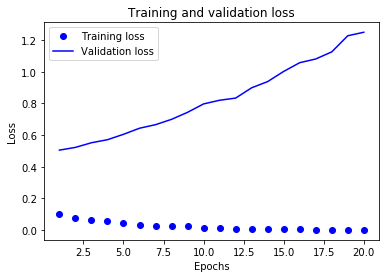

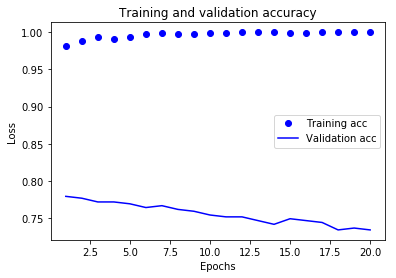

In [19]:
# Training process plot 
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [16]:
# Test performance  
score = model.evaluate(x_test, y_test, batch_size=128,verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

499/499 [==============================] - 0s 610us/step
Test score: 0.4609401606486173
Test accuracy: 0.821643291470522


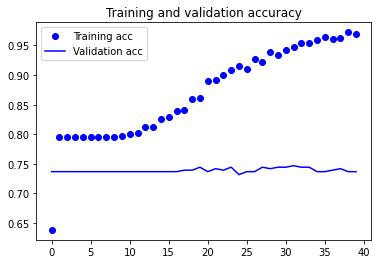

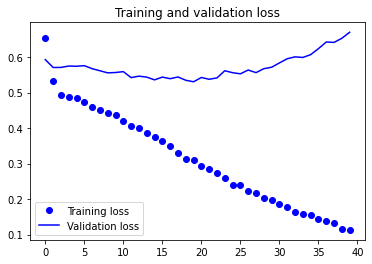

In [77]:
# Training process plot - An example